In [2]:
#Importing packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

import seaborn as sns

In [4]:
#Importing the data as panda dataframe
df_rpi = pd.read_csv('csv/dbResPriceIndex2017-2020.csv')

df_rpi.head()

,REF_DATE,GEO,DGUID,Building type,Construction type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,"Montréal, Quebec",2016S0503462,"Total, building type","Total, construction type","Index, 2017=100",373,units,0,v1073542625,2.1.1,98.1,NaN,NaN,NaN,1
1,2017-04,"Montréal, Quebec",2016S0503462,"Total, building type","Total, construction type","Index, 2017=100",373,units,0,v1073542625,2.1.1,99.3,NaN,NaN,NaN,1
2,2017-07,"Montréal, Quebec",2016S0503462,"Total, building type","Total, construction type","Index, 2017=100",373,units,0,v1073542625,2.1.1,100.6,NaN,NaN,NaN,1
3,2017-10,"Montréal, Quebec",2016S0503462,"Total, building type","Total, construction type","Index, 2017=100",373,units,0,v1073542625,2.1.1,102.0,NaN,NaN,NaN,1
4,2018-01,"Montréal, Quebec",2016S0503462,"Total, building type","Total, construction type","Index, 2017=100",373,units,0,v1073542625,2.1.1,102.0,NaN,NaN,NaN,1


In [6]:
# Overview of the data
df_rpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REF_DATE           702 non-null    object 
 1   GEO                702 non-null    object 
 2   DGUID              702 non-null    object 
 3   Building type      702 non-null    object 
 4   Construction type  702 non-null    object 
 5   UOM                702 non-null    object 
 6   UOM_ID             702 non-null    int64  
 7   SCALAR_FACTOR      702 non-null    object 
 8   SCALAR_ID          702 non-null    int64  
 9   VECTOR             702 non-null    object 
 10  COORDINATE         702 non-null    object 
 11  VALUE              702 non-null    float64
 12  STATUS             35 non-null     object 
 13  SYMBOL             0 non-null      float64
 14  TERMINATED         0 non-null      float64
 15  DECIMALS           702 non-null    int64  
dtypes: float64(3), int64(3), o

In [7]:
#Dropping the empty columns (columns with 0 non-null count):
df_rpi = df_rpi.drop(['SYMBOL', 'TERMINATED'], axis=1)

#Dropping columns that do not contribute information for the analysis:
df_rpi = df_rpi.drop(['STATUS', 'DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 
                                    'VECTOR', 'COORDINATE', 'DECIMALS'], axis=1)

df_rpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REF_DATE           702 non-null    object 
 1   GEO                702 non-null    object 
 2   Building type      702 non-null    object 
 3   Construction type  702 non-null    object 
 4   VALUE              702 non-null    float64
dtypes: float64(1), object(4)
memory usage: 27.5+ KB


In [8]:
df_rpi

,REF_DATE,GEO,Building type,Construction type,VALUE
0,2017-01,"Montréal, Quebec","Total, building type","Total, construction type",98.1
1,2017-04,"Montréal, Quebec","Total, building type","Total, construction type",99.3
2,2017-07,"Montréal, Quebec","Total, building type","Total, construction type",100.6
3,2017-10,"Montréal, Quebec","Total, building type","Total, construction type",102.0
4,2018-01,"Montréal, Quebec","Total, building type","Total, construction type",102.0
...,...,...,...,...,...
697,2019-01,"Victoria, British Columbia",Condominium apartment,Resale,107.5
698,2019-04,"Victoria, British Columbia",Condominium apartment,Resale,113.1
699,2019-07,"Victoria, British Columbia",Condominium apartment,Resale,112.7
700,2019-10,"Victoria, British Columbia",Condominium apartment,Resale,113.5


In [12]:
# Get the unique GEO values
df_rpi.GEO.unique()

array(['Montréal, Quebec',
       'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
       'Toronto, Ontario', 'Calgary, Alberta',
       'Vancouver, British Columbia', 'Victoria, British Columbia'],
      dtype=object)

In [27]:
# Filter to only show Toronto, Vancouver and Calgary
df_rpi2 = df_rpi[df_rpi['GEO'].isin(['Calgary, Alberta', 'Toronto, Ontario','Vancouver, British Columbia'])]
df_rpi2

,REF_DATE,GEO,Building type,Construction type,VALUE
234,2017-01,"Toronto, Ontario","Total, building type","Total, construction type",95.3
235,2017-04,"Toronto, Ontario","Total, building type","Total, construction type",103.3
236,2017-07,"Toronto, Ontario","Total, building type","Total, construction type",101.9
237,2017-10,"Toronto, Ontario","Total, building type","Total, construction type",99.5
238,2018-01,"Toronto, Ontario","Total, building type","Total, construction type",100.0
...,...,...,...,...,...
580,2019-01,"Vancouver, British Columbia",Condominium apartment,Resale,113.5
581,2019-04,"Vancouver, British Columbia",Condominium apartment,Resale,111.4
582,2019-07,"Vancouver, British Columbia",Condominium apartment,Resale,109.0
583,2019-10,"Vancouver, British Columbia",Condominium apartment,Resale,110.0


In [28]:
#Grouping by quarter and city to better understand the data structure
df_rpi2.groupby(['REF_DATE', 'GEO','Building type','Construction type']).VALUE.mean()

REF_DATE  GEO                          Building type          Construction type       
2017-01   Calgary, Alberta             Condominium apartment  New build                   100.9
                                                              Resale                      100.4
                                                              Total, construction type    100.7
                                       House                  New build                    99.7
                                                              Resale                       98.8
                                                                                          ...  
2020-01   Vancouver, British Columbia  House                  Resale                      102.8
                                                              Total, construction type    102.4
                                       Total, building type   New build                   103.7
                                                 

In [35]:
# We should analyze prices for condominiums and houses separately, disregarding between new build and resale
df_rpi3 = df_rpi2[df_rpi2['Construction type'].isin(['Total, construction type'])]
df_rpi3
df_condo = df_rpi3[df_rpi3['Building type'].isin(['Condominium apartment'])]
df_house = df_rpi3[df_rpi3['Building type'].isin(['House'])]

    REF_DATE                          GEO          Building type  \
312  2017-01             Toronto, Ontario  Condominium apartment   
313  2017-04             Toronto, Ontario  Condominium apartment   
314  2017-07             Toronto, Ontario  Condominium apartment   
315  2017-10             Toronto, Ontario  Condominium apartment   
316  2018-01             Toronto, Ontario  Condominium apartment   
317  2018-04             Toronto, Ontario  Condominium apartment   
318  2018-07             Toronto, Ontario  Condominium apartment   
319  2018-10             Toronto, Ontario  Condominium apartment   
320  2019-01             Toronto, Ontario  Condominium apartment   
321  2019-04             Toronto, Ontario  Condominium apartment   
322  2019-07             Toronto, Ontario  Condominium apartment   
323  2019-10             Toronto, Ontario  Condominium apartment   
324  2020-01             Toronto, Ontario  Condominium apartment   
429  2017-01             Calgary, Alberta  Condo

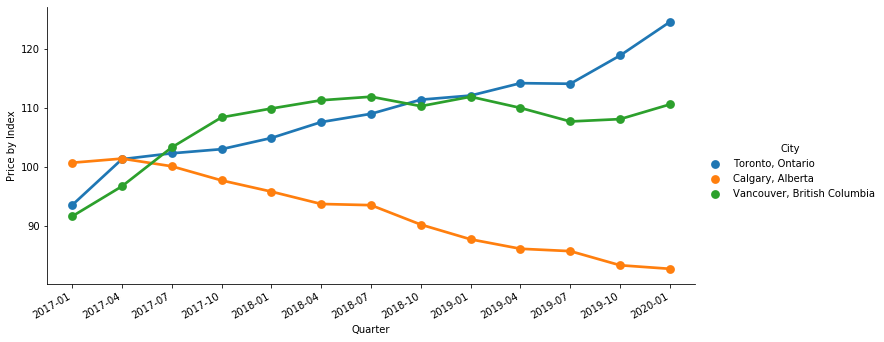

In [38]:
# Plot condominium prices by quarter for each city
fig1 = sns.catplot(x='REF_DATE', y='VALUE', hue='GEO', kind='point', data=df_condo, height=5, aspect=10/5)
fig1.set(xlabel='Quarter', ylabel='Price by Index')
fig1._legend.set_title("City")
fig1.fig.autofmt_xdate();

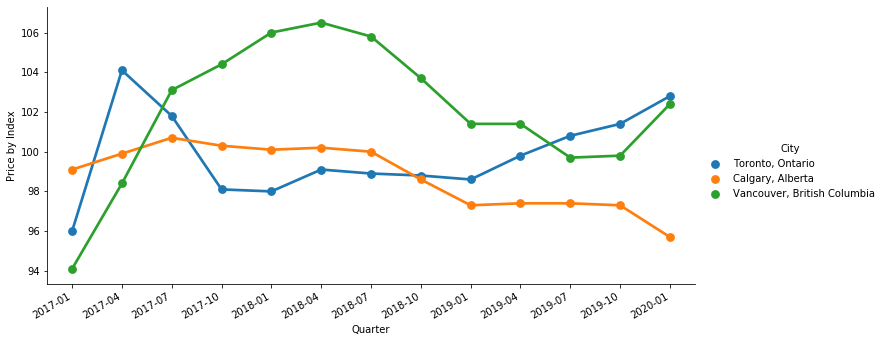

In [39]:
# Plot house prices by quarter for each city
fig1 = sns.catplot(x='REF_DATE', y='VALUE', hue='GEO', kind='point', data=df_house, height=5, aspect=10/5)
fig1.set(xlabel='Quarter', ylabel='Price by Index')
fig1._legend.set_title("City")
fig1.fig.autofmt_xdate();

There is a clear distinction in trends between Condominiums and House prices. In Toronto and Vancouver, there has been a persistent upward trends since Q1 2017. Vancouver has reached a more stabilized level, while Toronto has not shown any evidence of stabilization. Meanwhile, Condominium prices in Calgary have been steadily decreasing in the same time period. House prices peaked between 2017 and 2018 in Vancouver and Toronto and experienced a slight decline since then. However, they have gradually recovered and are close to 2017 levels once again. Calgary house prices decreased, unsurprisingly, however not at the same pace as condominium prices. 